In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF Hub version:",hub.__version__)

#Check GPU availability->
print("GPU available"," (Yes!!)" if tf.config.list_physical_devices("GPU") else "(No)")

TF version: 2.11.0
TF Hub version: 0.13.0
GPU available (No)


In [ ]:
import pandas as pd
from IPython.display import Image
labels_csv=pd.read_csv("Dog Vision/labels.csv")


In [ ]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
#Find the unique label values
unique_breeds=np.unique(labels)

In [ ]:
#Define image size
IMG_SIZE= 224

#create a function for above thing->
def process_image(image_path):
  #read image
  image=tf.io.read_file(image_path)
  #turn jpeg image into tensors
  image=tf.image.decode_jpeg(image,channels=3)
  #normalise from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
# Define batch size of 32
BATCH_SIZE=32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  #if the data is test dataset, maay not have labels
  if(test_data):
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Turn prediction table into their respective label .
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
# function to load the trained model
def load_model(model_path):
  """
  Loads a saved model from specified path
  """
  print(f"Loading saved model from:{model_path}...")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
loaded_full_model=load_model('Dog Vision/models/20230320-10101679307037-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from:drive/My Drive/Dog Vision/models/20230320-10101679307037-full-image-set-mobilenetv2-Adam.h5...


In [ ]:
## Make predictions on custom image
custom_path="Dog Vision/my-dog-photos/"
custom_image_paths=[custom_path+fname for fname in os.listdir(custom_path)]

In [ ]:
custom_data=create_data_batches(custom_image_paths,test_data=True)

Creating test data batches


In [ ]:
#make predictions on custom data
custom_preds=loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

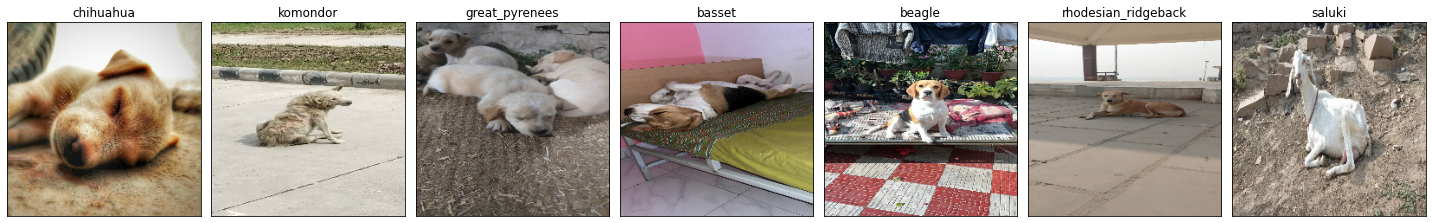

In [ ]:
import matplotlib.pyplot as plt
n=len(custom_preds)
plt.figure(figsize=(20,20))
for i, image in enumerate(custom_images):
  plt.subplot(1,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
  plt.tight_layout()